# Импортирование библиотек

In [1]:
import os
import docx
import re
import pandas as pd 
import numpy as np



import matplotlib.pyplot as plt 
import seaborn as sns

import spacy

from sklearn import metrics
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer as snow



C:\Prog\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Prog\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Prog\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

# Переход в необходимую территорю

In [2]:
def get_list_doc(folder):
    paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('docx') and not file.startswith('~'):
                paths.append(os.path.join(file))
    return paths

In [8]:
path =get_list_doc(r"C:\Users\79219\Desktop\digital_xakaton\document")

In [25]:
len(path)

165

# Словарь по таргетам 

In [4]:
def get_all_paragrah_target(list_doc):
    str_falsee = "{"
    dict_non_targe = {}
    dict_text_target = {}
    len_doc = len(list_doc)
    count = 0
    for doc in list_doc:
        print(count+1)
        doc = docx.Document(doc)
        for paragraph in doc.paragraphs:
            if  str_falsee not in  paragraph.text:
                    dict_non_targe[paragraph.text] = 'nan'
            for str_ in range(len(paragraph.text)):
                if paragraph.text[str_] == '{':
                    star_ = str_
                if paragraph.text[str_] == '}':
                    end_ = str_
                    range_ = end_ - star_
                    string_text_target = paragraph.text[end_+1:-end_-1]
                    target = paragraph.text[star_+1:end_]
                    dict_text_target[string_text_target] = target
                
        count +=1


    return dict_text_target,dict_non_targe

In [5]:
path =r'C:\Users\79219\Desktop\digital_xakaton\document'

In [6]:
path = os.chdir(path)

In [9]:
%%time
dict_text_target,dict_nan_target  = get_all_paragrah_target(path)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
CPU times: total: 5min 24s
Wall time: 5min 24s


In [10]:
print(len(dict_nan_target))


5018


In [11]:
print(len(dict_text_target))

16272


In [12]:
len(dict_nan_target) + len(dict_text_target)

21290

# Создание Df

In [13]:
df_target = pd.DataFrame(list(dict_text_target.items()),
                   columns=['text', 'target'])

In [14]:
df_target

,text,target
0,"Настоящие Правила устанавливают цели, условия ...",2
1,,18
2,Сведения о субсидии размещаются на едином порт...,7
3,"Понятия, используемые в настоящих Правилах, оз...",1
4,"""вознаграждение"" - процентные отчисления, выпл...",1
...,...,...
16267,"Ответственность за нарушение условий, цели и п...",38
16268,возврат средств субсидии в федеральный бюджет ...,38
16269,"штрафные санкции, рассчитываемые в соответстви...",38
16270,"В случае если требование, указанное в настоящ...",38


In [15]:
raw = df_target[df_target['target'] == '']

In [16]:
raw.index

Int64Index([11379], dtype='int64')

In [17]:
df_target.drop(labels = [11379],axis = 0, inplace = True)

In [18]:
df_non_target = pd.DataFrame(list(dict_nan_target.items()),
                   columns=['text', 'target'])

In [19]:
df_non_target.target.value_counts()

nan    5018
Name: target, dtype: int64

# Слияние Df

In [20]:
df_append = df_non_target.append(df_target, ignore_index=True)

<ipython-input-20-ca48f2f8f6ec>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_non_target.append(df_target, ignore_index=True)


In [21]:
df_append = df_append.sample(frac=1)

In [22]:
df_append['target'].value_counts()[:].sum()

21289

# Сохранение Df

In [2]:
df_append.to_csv(r'C:\Users\79219\Desktop\digital_xakaton\data.csv', index=False)

NameError: name 'df_append' is not defined

In [23]:
df_test = pd.read_csv(r'C:\Users\79219\Desktop\digital_xakaton\data.csv')

In [24]:
df_test

,text,target
0,"Отчетность об осуществлении расходов, источни...",36
1,кредитный договор (соглашение) предусматривае...,24
2,"Отчетность, указанная в и настоящих Правил, ...",36
3,Основаниями для отклонения Министерством экон...,17
4,"В случае если значение выражения более 1, его...",22
...,...,...
21284,"информация, содержащаяся в документах, указанн...",17
21285,"значения результата предоставления субсидии, ...",24
21286,"значение результатов предоставления субсидии,...",27
21287,обязанность организации направлять сведения о ...,24


# Анализ Df 

In [25]:
df_append = df_test.copy()

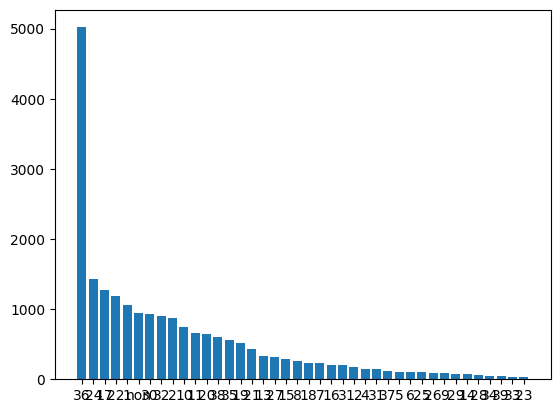

In [26]:
list_cancer = df_append['target'].unique()
list_count_values = df_append['target'].value_counts()
plt.bar(list_cancer,list_count_values)
plt.show()

In [27]:
df_append['target'].unique()


array(['36', '24', '17', '22', '1', 'non', '30', '32', '2', '10', '11',
       '20', '38', '35', '19', '21', '13', '27', '15', '8', '18', '7',
       '16', '3', '12', '4', '31', '37', '5', '6', '25', '26', '9', '29',
       '14', '28', '34', '39', '33', '23'], dtype=object)

In [28]:
df_append.target.value_counts()

non    5018
24     1432
11     1266
19     1183
10     1056
38      942
22      927
27      909
35      880
15      740
1       656
2       645
30      602
36      556
21      523
12      438
20      329
17      312
4       291
37      263
7       233
13      227
3       209
16      202
6       175
29      151
28      144
26      114
25      109
18      105
32      102
31       95
5        85
8        80
39       72
23       62
33       46
14       41
34       38
9        31
Name: target, dtype: int64

In [29]:
len(df_append.target.unique())

40

In [30]:
df_append.isnull().sum()

text      2
target    0
dtype: int64

In [31]:
df_append.fillna(0)

,text,target
0,"Отчетность об осуществлении расходов, источни...",36
1,кредитный договор (соглашение) предусматривае...,24
2,"Отчетность, указанная в и настоящих Правил, ...",36
3,Основаниями для отклонения Министерством экон...,17
4,"В случае если значение выражения более 1, его...",22
...,...,...
21284,"информация, содержащаяся в документах, указанн...",17
21285,"значения результата предоставления субсидии, ...",24
21286,"значение результатов предоставления субсидии,...",27
21287,обязанность организации направлять сведения о ...,24


In [32]:
df_append.isnull().sum()

text      2
target    0
dtype: int64

In [33]:
df_append.text.duplicated().sum()

24

# Функции для предобработки 

In [34]:
stop_words = set(stopwords.words('russian'))
nlp = spacy.load('ru_core_news_lg')
stemmer = snow('russian')
text_cleaning_re = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"


In [35]:
def clear_text(text):
    tokens = []
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    text = re.sub(r'\s+', ' ', text)
    for token in text.split():
        if token not in stop_words:
            token = "".join(c for c in token if token.isalnum())
            tokens.append(token)
    return " ".join(tokens)

def pre_process(text):
    tokens = []
    for token in text.split():
        tokens.append(stemmer.stem(token))
    return " ".join(tokens)


def lemm_text_test(doc):
    tokens = []
    sentense = nlp(doc)
    for token in sentense:
        tokens.append(token.lemma_)
        
    return " ".join(tokens)

In [36]:
df_append.text

0         Отчетность об осуществлении расходов, источни...
1         кредитный договор (соглашение) предусматривае...
2        Отчетность, указанная в  и  настоящих Правил, ...
3         Основаниями для отклонения Министерством экон...
4        В случае если значение выражения  более 1, его...
                               ...                        
21284    информация, содержащаяся в документах, указанн...
21285     значения результата предоставления субсидии, ...
21286     значение результатов предоставления субсидии,...
21287    обязанность организации направлять сведения о ...
21288    организации выявления и сопровождения дальнейш...
Name: text, Length: 21289, dtype: object

In [37]:
%%time
texts_ = df_append.text.apply(lambda x: clear_text(x))

CPU times: total: 1.23 s
Wall time: 1.23 s


In [38]:
texts_

0        отчетность осуществлении расходов источником ф...
1        кредитный договор соглашение предусматривает п...
2        отчетность указанная настоящих правил представ...
3        основаниями отклонения министерством экономиче...
4        случае значение выражения значение принимается...
                               ...                        
21284    информация содержащаяся документах указанных н...
21285    значения результата предоставления субсидии со...
21286    значение результатов предоставления субсидии т...
21287    обязанность организации направлять сведения пр...
21288    организации выявления сопровождения дальнейшег...
Name: text, Length: 21289, dtype: object

In [39]:
%%time
texts_stemm = texts_.apply(lambda x: pre_process(x))

CPU times: total: 18.4 s
Wall time: 18.4 s


In [40]:
texts_stemm

0        отчетн осуществлен расход источник финансов об...
1        кредитн договор соглашен предусматрива получен...
2        отчетн указа настоя прав представля форм устан...
3        основан отклонен министерств экономическ разви...
4                 случа значен выражен значен принима равн
                               ...                        
21284    информац содержа документ указа настоя прав чи...
21285    значен результат предоставлен субсид соответст...
21286    значен результат предоставлен субсид такж пока...
21287    обязан организац направля сведен проведен науч...
21288    организац выявлен сопровожден дальн развит дет...
Name: text, Length: 21289, dtype: object

# TFiDF

In [41]:
tfidf=TfidfVectorizer(max_features=12500,ngram_range=(1,3))

# Создание X , Y

In [42]:
X = texts_stemm
y = df_append.target.values

In [43]:
X.shape

(21289,)

In [44]:
y.shape

(21289,)

In [50]:
X_test = tfidf.fit_transform(X)

# разделение выборки

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=56)

In [46]:
X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

# Первая модель ML

In [47]:
LR = LogisticRegression( random_state=64, solver='lbfgs', max_iter=10000, n_jobs=-1)


In [48]:
bb=BernoulliNB(alpha=0.5)


In [49]:
def train(model):
    model.fit(X_train_vector,y_train)
    y_predict=model.predict(X_test_vector)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [50]:
X_train_vector

<13837x12500 sparse matrix of type '<class 'numpy.float64'>'
	with 489573 stored elements in Compressed Sparse Row format>

In [51]:
%%time
train(bb)

BernoulliNB(alpha=0.5)
[[ 102    4    0 ...    0    0   70]
 [   0  227    5 ...    0    0   56]
 [  15    9  264 ...    0    0   76]
 ...
 [   1    4    0 ...    3    0    5]
 [   0    4    0 ...    0    0    4]
 [  28   14    8 ...    0    0 1511]]
              precision    recall  f1-score   support

           1       0.41      0.44      0.42       231
          10       0.61      0.62      0.61       365
          11       0.74      0.59      0.66       446
          12       0.32      0.12      0.18       164
          13       0.28      0.08      0.12        89
          14       0.00      0.00      0.00        22
          15       0.38      0.39      0.38       253
          16       0.44      0.11      0.17        76
          17       0.57      0.47      0.51       100
          18       0.33      0.11      0.16        38
          19       0.63      0.48      0.54       403
           2       0.51      0.40      0.45       219
          20       0.44      0.44      0.44   

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
%%time
train(LR)

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=64)
[[  88    1    3 ...    0    0  100]
 [   0  244    6 ...    0    0   34]
 [   5    3  304 ...    0    0   70]
 ...
 [   0    5    0 ...    2    0    8]
 [   2    8    0 ...    0    0    0]
 [   4   11   13 ...    0    0 1609]]
              precision    recall  f1-score   support

           1       0.69      0.38      0.49       231
          10       0.63      0.67      0.65       365
          11       0.71      0.68      0.70       446
          12       0.55      0.10      0.17       164
          13       1.00      0.01      0.02        89
          14       0.00      0.00      0.00        22
          15       0.46      0.41      0.43       253
          16       0.56      0.29      0.38        76
          17       0.60      0.48      0.53       100
          18       0.41      0.24      0.30        38
          19       0.65      0.69      0.67       403
           2       0.75      0.47      0.57       219
      

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
0.6029253891572732

0.6029253891572732

In [54]:
0.30515297906602257

0.30515297906602257

In [55]:
from sklearn.ensemble import RandomForestClassifier


In [56]:
classifier = RandomForestClassifier(n_estimators=2000, random_state=0, n_jobs=-1)

In [57]:
%%time
train(classifier)

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=0)
[[ 112    0    1 ...    0    0   93]
 [   1  249    4 ...    0    0   34]
 [   2    5  282 ...    0    0   58]
 ...
 [   0    4    0 ...    3    1    6]
 [   0    7    0 ...    0    0    4]
 [   8   13   13 ...    1    0 1590]]
              precision    recall  f1-score   support

           1       0.79      0.48      0.60       231
          10       0.64      0.68      0.66       365
          11       0.71      0.63      0.67       446
          12       0.47      0.22      0.30       164
          13       0.30      0.10      0.15        89
          14       1.00      0.09      0.17        22
          15       0.46      0.44      0.45       253
          16       0.60      0.36      0.45        76
          17       0.60      0.60      0.60       100
          18       0.26      0.18      0.22        38
          19       0.61      0.66      0.63       403
           2       0.79      0.57      0.66       219


C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
0.6245303274288782

0.6245303274288782

In [59]:
0.620101986044015

0.620101986044015

In [60]:
%%time
train(bb)

BernoulliNB(alpha=0.5)
[[ 102    4    0 ...    0    0   70]
 [   0  227    5 ...    0    0   56]
 [  15    9  264 ...    0    0   76]
 ...
 [   1    4    0 ...    3    0    5]
 [   0    4    0 ...    0    0    4]
 [  28   14    8 ...    0    0 1511]]
              precision    recall  f1-score   support

           1       0.41      0.44      0.42       231
          10       0.61      0.62      0.61       365
          11       0.74      0.59      0.66       446
          12       0.32      0.12      0.18       164
          13       0.28      0.08      0.12        89
          14       0.00      0.00      0.00        22
          15       0.38      0.39      0.38       253
          16       0.44      0.11      0.17        76
          17       0.57      0.47      0.51       100
          18       0.33      0.11      0.16        38
          19       0.63      0.48      0.54       403
           2       0.51      0.40      0.45       219
          20       0.44      0.44      0.44   

C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Prog\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
0.2917337627482555

0.2917337627482555

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [108]:
models= [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
LinearSVC(),
MultinomialNB(),
LogisticRegression(random_state=0),]

In [118]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.656959
LogisticRegression        0.618864
MultinomialNB             0.557330
RandomForestClassifier    0.260369
Name: accuracy, dtype: float64

In [62]:
model = LinearSVC()
train(model)

LinearSVC()
[[ 143    4    3 ...    0    0   45]
 [   0  258    9 ...    3    0   15]
 [  12    6  315 ...    0    0   34]
 ...
 [   2    2    0 ...    5    2    4]
 [   2    5    0 ...    0    1    0]
 [  19   15   18 ...    1    0 1520]]
              precision    recall  f1-score   support

           1       0.62      0.62      0.62       231
          10       0.65      0.71      0.68       365
          11       0.70      0.71      0.70       446
          12       0.46      0.28      0.35       164
          13       0.32      0.16      0.21        89
          14       0.67      0.09      0.16        22
          15       0.47      0.46      0.46       253
          16       0.58      0.55      0.57        76
          17       0.58      0.56      0.57       100
          18       0.32      0.26      0.29        38
          19       0.63      0.71      0.67       403
           2       0.68      0.64      0.66       219
          20       0.51      0.46      0.49       124
   

# сохранение модели

In [63]:
import pickle

In [65]:
pkl_filename = r"LinearSVC_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [66]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [68]:
score = pickle_model.score(X_test_vector, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 65.42 %


In [69]:
Ypredict = pickle_model.predict(X_test_vector)
Ypredict

array(['38', '30', '10', ..., 'non', '3', 'non'], dtype=object)

In [ ]:
def anakiz_file(path_to_file):
    